In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
import scipy.stats as stats
from matplotlib import pyplot as plt
from scipy.stats import chi2_contingency
from pandas.plotting import parallel_coordinates
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
from sklearn import preprocessing

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/ML/EX1/part1/train.csv")

In [ ]:
data.price_range.value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [ ]:
class_0 = data[data['price_range']==0]
class_1 = data[data['price_range']==1]
class_2 = data[data['price_range']==2]
class_3 = data[data['price_range']==3]

train = pd.concat([class_0[100:], class_1[100:], class_2[100:], class_3[100:]]).sample(frac=1)
test = pd.concat([class_0[:100], class_1[:100], class_2[:100], class_3[:100]])

In [ ]:
train.price_range.value_counts()

0    400
2    400
3    400
1    400
Name: price_range, dtype: int64

In [ ]:
test.price_range.value_counts()

0    100
1    100
2    100
3    100
Name: price_range, dtype: int64

In [ ]:
train.sample(4)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
839,1184,0,1.5,1,1,1,48,0.6,191,1,...,519,1577,3315,17,7,14,1,1,1,3
1858,1615,1,2.8,0,3,0,9,0.9,117,1,...,542,678,2948,8,3,3,1,1,0,2
1557,1211,1,1.2,0,0,0,28,0.3,130,2,...,58,963,2750,6,1,14,0,1,0,2
945,832,0,1.1,0,0,1,46,0.3,93,6,...,820,1366,3317,8,0,19,1,1,0,3


In [ ]:
train.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
test.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
chisqt_1 = pd.crosstab( train.touch_screen,train.price_range, margins=True)
value = np.array([chisqt_1.iloc[0][0:4].values,
                  chisqt_1.iloc[1][0:4].values])
p = chi2_contingency(value)[1]
print("p value is " + str(p))
if p > 0.05:
	print('Probably independent(H0 accepted)')
else:
	print('Probably dependent(H0 rejected)')

p value is 0.2873700303633279
Probably independent(H0 accepted)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


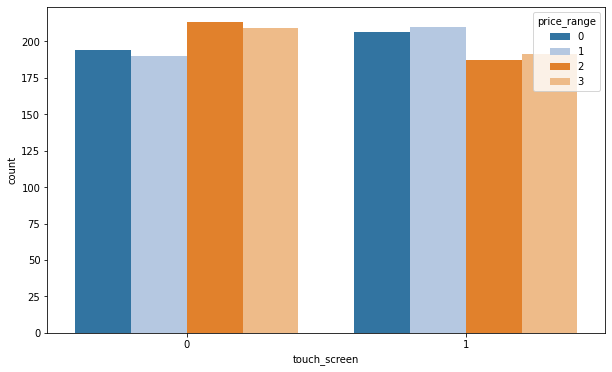

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(train.touch_screen, hue=train.price_range, palette="tab20")
plt.show()

In [ ]:
chisqt_2 = pd.crosstab( train.three_g, train.price_range, margins=True)
value = np.array([chisqt_2.iloc[0][0:4].values,
                  chisqt_2.iloc[1][0:4].values])
p = chi2_contingency(value)[1]
print("p value is " + str(p))
if p > 0.05:
	print('Probably independent(H0 accepted)')
else:
	print('Probably dependent(H0 rejected)')

p value is 0.7736527543297278
Probably independent(H0 accepted)


Tests whether the mean of one sample is equal to a

H0: the means of the sample is equal a.

H1: the means of the sample is unequal a.

In [ ]:
train.describe().battery_power

count    1600.000000
mean     1239.182500
std       439.309407
min       501.000000
25%       856.000000
50%      1225.000000
75%      1617.000000
max      1998.000000
Name: battery_power, dtype: float64

In [ ]:
a = 1400
statistic, p = stats.ttest_1samp(train.battery_power , popmean= a)
print(f'P value ={p}')
if p < 0.05:
  print(f'H0 rejected, mean of this sample is not equal to {a}.')
else:
  print(f'H0 accepted, mean of this sample is equal to {a}.')

P value =1.1770923789759746e-45
H0 rejected, mean of this sample is not equal to 1400.


In [ ]:
train.describe().ram

count    1600.000000
mean     2127.402500
std      1084.028794
min       256.000000
25%      1219.500000
50%      2130.500000
75%      3079.250000
max      3998.000000
Name: ram, dtype: float64

In [ ]:
a = 2100
statistic, p = stats.ttest_1samp(train.ram , popmean= a)
print(f'P value ={p}')
if p < 0.05:
  print(f'H0 rejected, mean of this sample is not equal to {a}.')
else:
  print(f'H0 accepted, mean of this sample is equal to {a}.')

P value =0.312104557629628
H0 accepted, mean of this sample is equal to 2100.


In [ ]:
cor , p = stats.spearmanr(train.mobile_wt,train.m_dep)
print(f'P value ={p}')
if p < 0.05:
  print(f'H0 rejected, There is a significant linear relationship.')
else:
  print(f'H0 accepted, There is not a significant linear relationship.')

P value =0.28183540492732034
H0 accepted, There is not a significant linear relationship.


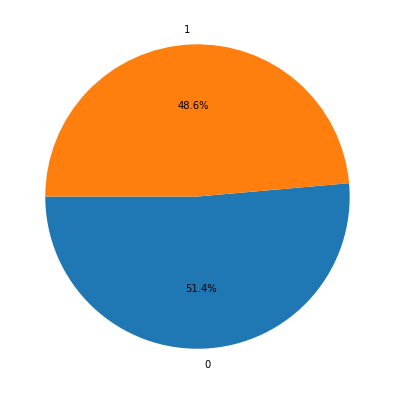

In [ ]:
plt.figure(figsize=(13,7))
g = plt.pie(class_0.blue.value_counts(), labels= class_0.blue.value_counts().index, autopct='%1.1f%%', startangle=180)
plt.show()

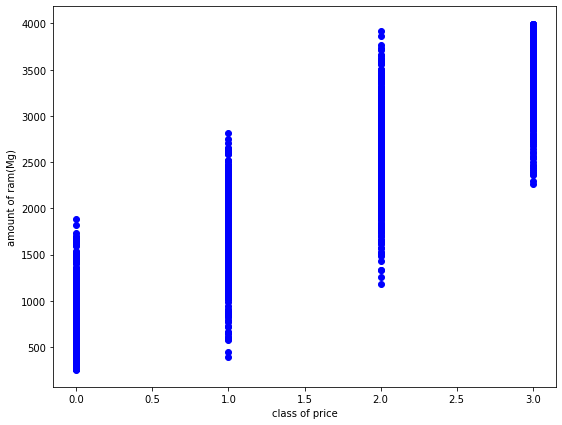

In [ ]:
plt.figure(figsize=(9,7))
plt.xlabel('class of price')
plt.ylabel('amount of ram(Mg)')
plt.plot(np.array(train.price_range), np.array(train.ram), "bo")

In [ ]:
class_0_sample = class_0.sample(40)
class_3_sample = class_3.sample(40)

In [ ]:
class_0_3 = pd.concat([class_0_sample, class_3_sample], axis=0)

In [ ]:
Asia_map = {'price_class':class_0_3.price_range,
      'core':class_0_3.n_cores*500,
      'ram':class_0_3.ram  
      }

Asia_map_df = pd.DataFrame(Asia_map)

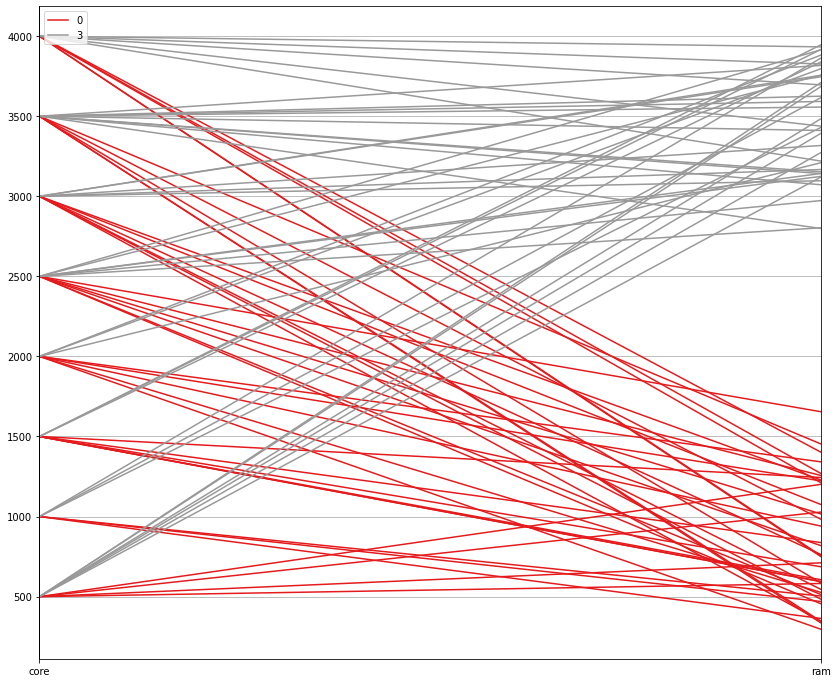

In [ ]:
plt.figure(figsize=(14, 12))
parallel_coordinates(Asia_map_df, 'price_class', colormap=plt.get_cmap("Set1"))
plt.legend(loc='upper left')
plt.show()

In [ ]:
y_train = train['price_range']
x_train = train.drop(columns='price_range')

y_test = test['price_range']
x_test = test.drop(columns='price_range')

**Decision** **tree**

In [ ]:
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

D_tree = tree.DecisionTreeClassifier()
D_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
D_tree.score(x_test, y_test)

0.8475

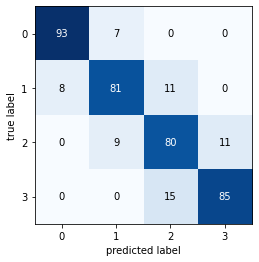

In [ ]:
cm = confusion_matrix(y_test, D_tree.predict(x_test))
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

**Naive Bayes**

In [ ]:
naive = GaussianNB()
naive.fit(x_train, y_train)

GaussianNB()

In [ ]:
naive.score(x_test, y_test)

0.805

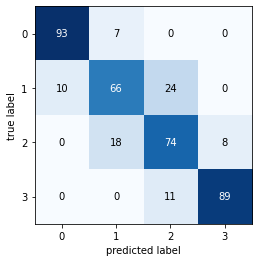

In [ ]:
cm = confusion_matrix(y_test, naive.predict(x_test))
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

**Logistic Regression**

In [ ]:
logreg_1 = LogisticRegression(multi_class='ovr' )
logreg_1.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression(multi_class='ovr')

In [ ]:
logreg_1.score(x_test, y_test)

0.6825

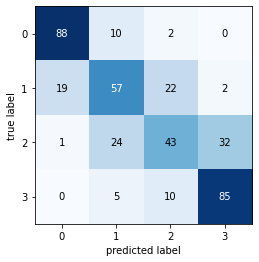

In [ ]:
cm = confusion_matrix(y_test, logreg_1.predict(x_test))
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

In [ ]:
logreg_2 = LogisticRegression(multi_class='ovr', max_iter=200 )
logreg_2.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression(max_iter=200, multi_class='ovr')

In [ ]:
logreg_2.score(x_test, y_test)

0.6825

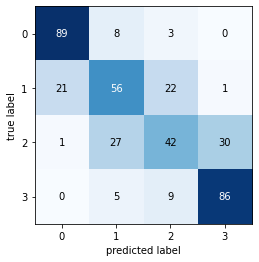

In [ ]:
cm = confusion_matrix(y_test, logreg_2.predict(x_test))
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

In [ ]:
logreg_3 = LogisticRegression(multi_class='ovr', solver='liblinear')
logreg_3.fit(x_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [ ]:
logreg_3.score(x_test, y_test)

0.7825

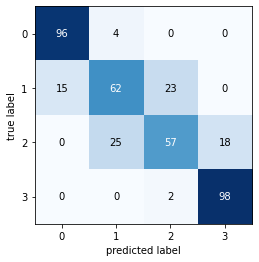

In [ ]:
cm = confusion_matrix(y_test, logreg_3.predict(x_test))
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

Feature: battery_power,   Score: -0.0032190544425082825
Feature: blue,   Score: 0.18993736311794207
Feature: clock_speed,   Score: 0.6053635801079029
Feature: dual_sim,   Score: 0.37709421790352365
Feature: fc,   Score: -0.0026652975433267344
Feature: four_g,   Score: 0.1501863819862536
Feature: int_memory,   Score: 0.019287494731801597
Feature: m_dep,   Score: 0.7051967916184363
Feature: mobile_wt,   Score: 0.022613907615278116
Feature: n_cores,   Score: 0.25773435197556166
Feature: pc,   Score: 0.044136813441349426
Feature: px_height,   Score: -0.002163392513048264
Feature: px_width,   Score: -0.0014376738317832735
Feature: ram,   Score: -0.006640928060468122
Feature: sc_h,   Score: 0.1432903033579298
Feature: sc_w,   Score: -0.007490001567736572
Feature: talk_time,   Score: 0.05173485650721136
Feature: three_g,   Score: 0.4738842866020957
Feature: touch_screen,   Score: 0.4350590211686442
Feature: wifi,   Score: 0.6734053644662799


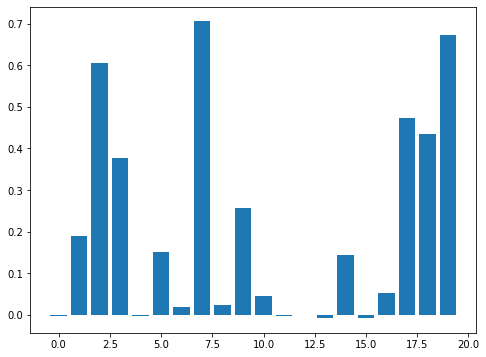

In [ ]:
positive_features = []
over_9_features = []
importance = logreg_3.coef_[0]
plt.figure(figsize=(8, 6))

for i,v in enumerate(importance):
  print(f'Feature: {x_train.columns[i]},   Score: {v}')
  if (v > 0):
    positive_features.append(x_train.columns[i])
  if (v > 0.09):
    over_9_features.append(x_train.columns[i])
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
positive_features

['blue',
 'clock_speed',
 'dual_sim',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'sc_h',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi']

In [ ]:
over_9_features

['blue',
 'clock_speed',
 'dual_sim',
 'four_g',
 'm_dep',
 'n_cores',
 'sc_h',
 'three_g',
 'touch_screen',
 'wifi']

positive_features

In [ ]:
logreg_positive = LogisticRegression(multi_class='ovr', solver='liblinear')
logreg_positive.fit(x_train[positive_features], y_train)

logreg_positive.score(x_test[positive_features], y_test)

0.3075

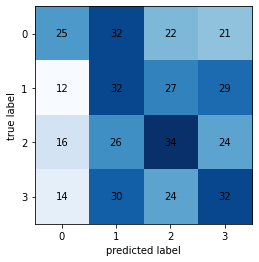

In [ ]:
cm = confusion_matrix(y_test, logreg_positive.predict(x_test[positive_features]))
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

over_9_features

In [ ]:
logreg = LogisticRegression(multi_class='ovr', solver='liblinear')
logreg.fit(x_train[over_9_features], y_train)

logreg.score(x_test[over_9_features], y_test)

0.2875

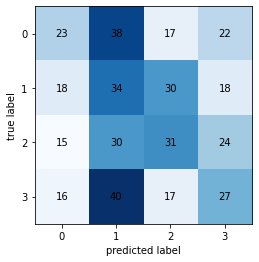

In [ ]:
cm = confusion_matrix(y_test, logreg.predict(x_test[over_9_features]))
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

MinMax Scaler

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler().fit(x_train)

train_minmax_scaled = min_max_scaler.transform(x_train)
test_minmax_scaled = min_max_scaler.transform(x_test)

In [ ]:
logreg_MM = LogisticRegression(multi_class='ovr', solver='liblinear')
logreg_MM.fit(train_minmax_scaled, y_train)

logreg_MM.score(test_minmax_scaled, y_test)

0.7925

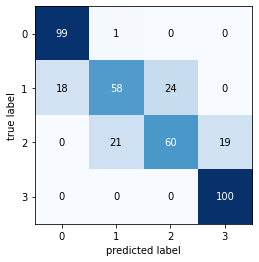

In [ ]:
cm = confusion_matrix(y_test, logreg_MM.predict(test_minmax_scaled))
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

Standard Scaler

In [ ]:
scaler = preprocessing.StandardScaler().fit(x_train)

train_Sscaled = scaler.transform(x_train)
test_Sscaled = scaler.transform(x_test)

In [ ]:
logreg_standard = LogisticRegression(multi_class='ovr', solver='liblinear')
logreg_standard.fit(train_Sscaled, y_train)

logreg_standard.score(test_Sscaled, y_test)

0.8275

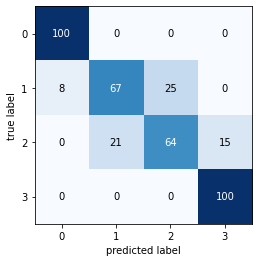

In [ ]:
cm = confusion_matrix(y_test, logreg_standard.predict(test_Sscaled))
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

**PCA**

POV = 0.75

In [ ]:
pca = PCA(n_components = 0.75, svd_solver = 'full')
 
X_train_75 = pca.fit_transform(train_Sscaled)
X_test_75 = pca.transform(test_Sscaled)

In [ ]:
print("number of features with pov 0.75  ->",pca.n_components_)

number of features with pov 0.75  -> 13


In [ ]:
logreg_75 = LogisticRegression(multi_class='ovr', solver='liblinear')
logreg_75.fit(X_train_75, y_train)

logreg_75.score(X_test_75, y_test)

0.6125

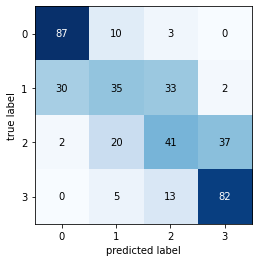

In [ ]:
cm = confusion_matrix(y_test, logreg_75.predict(X_test_75))
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

POV = 0.80

In [ ]:
pca = PCA(n_components = 0.8, svd_solver = 'full')
 
X_train_80 = pca.fit_transform(train_Sscaled)
X_test_80 = pca.transform(test_Sscaled)

In [ ]:
print("number of features with pov 0.80  ->",pca.n_components_)

number of features with pov 0.80  -> 14


In [ ]:
logreg_80 = LogisticRegression(multi_class='ovr', solver='liblinear')
logreg_80.fit(X_train_80, y_train)

logreg_80.score(X_test_80, y_test)

0.6225

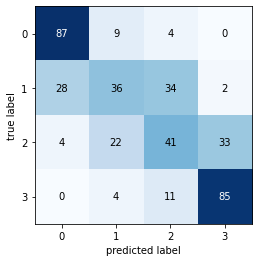

In [ ]:
cm = confusion_matrix(y_test, logreg_80.predict(X_test_80))
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

POV = 0.90

In [ ]:
pca = PCA(n_components = 0.9, svd_solver = 'full')
 
X_train_90 = pca.fit_transform(train_Sscaled)
X_test_90 = pca.transform(test_Sscaled)

In [ ]:
print("number of features with pov 0.90  ->",pca.n_components_)

number of features with pov 0.90  -> 16


In [ ]:
logreg_90 = LogisticRegression(multi_class='ovr', solver='liblinear')
logreg_90.fit(X_train_90, y_train)

logreg_90.score(X_test_90, y_test)

0.8325

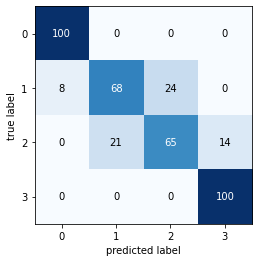

In [ ]:
cm = confusion_matrix(y_test, logreg_90.predict(X_test_90))
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

POV = 0.95

In [ ]:
pca = PCA(n_components = 0.95, svd_solver = 'full')
 
X_train_95 = pca.fit_transform(train_Sscaled)
X_test_95 = pca.transform(test_Sscaled)

In [ ]:
print("number of features with pov 0.95  ->",pca.n_components_)

number of features with pov 0.95  -> 18


In [ ]:
logreg_95 = LogisticRegression(multi_class='ovr', solver='liblinear')
logreg_95.fit(X_train_95, y_train)

logreg_95.score(X_test_95, y_test)

0.835

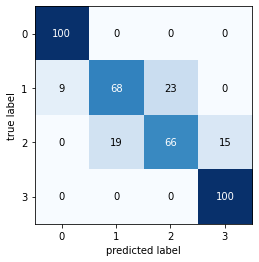

In [ ]:
cm = confusion_matrix(y_test, logreg_95.predict(X_test_95))
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

POV = 0.99

In [ ]:
pca = PCA(n_components = 0.99, svd_solver = 'full')
 
X_train_99 = pca.fit_transform(train_Sscaled)
X_test_99 = pca.transform(test_Sscaled)

In [ ]:
print("number of features with pov 0.99  ->",pca.n_components_)

number of features with pov 0.99  -> 20


In [ ]:
logreg_99 = LogisticRegression(multi_class='ovr', solver='liblinear')
logreg_99.fit(X_train_99, y_train)

logreg_99.score(X_test_99, y_test)

0.8275

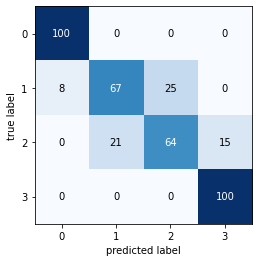

In [ ]:
cm = confusion_matrix(y_test, logreg_99.predict(X_test_99))
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

Imbalanced data

In [ ]:
train_Sscaled = pd.DataFrame(train_Sscaled)
test_Sscaled = pd.DataFrame(test_Sscaled)

train_Sscaled['IM_price_range'] = y_train.reset_index().price_range.replace([1, 2, 3], 4)
test_Sscaled['IM_price_range'] = y_test.reset_index().price_range.replace([1, 2, 3], 4)
ImB_train_y = train_Sscaled['IM_price_range']
ImB_test_y = test_Sscaled['IM_price_range']

In [ ]:
logreg_ImB = LogisticRegression(multi_class='ovr', solver='liblinear')
logreg_ImB.fit(train_Sscaled.drop(columns='IM_price_range'), ImB_train_y)

logreg_ImB.score(test_Sscaled.drop(columns='IM_price_range'), ImB_test_y)

0.9875

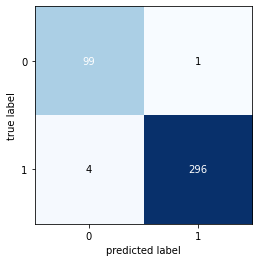

In [ ]:
cm = confusion_matrix(ImB_test_y, logreg_ImB.predict(test_Sscaled.drop(columns='IM_price_range')))
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

In [ ]:
df_1 = train_Sscaled[train_Sscaled['IM_price_range'] == 0]
other_df = train_Sscaled[train_Sscaled['IM_price_range'] != 0]  
df_1_upsampled = resample(df_1, random_state=42, n_samples=len(other_df), replace=True)
upsampled_train = pd.concat([df_1_upsampled,other_df])

upsampled_train.IM_price_range.value_counts()

0    1200
4    1200
Name: IM_price_range, dtype: int64

In [ ]:
upsampled_train_y = upsampled_train.IM_price_range
upsampled_train_x = upsampled_train.drop(columns='IM_price_range')

In [ ]:
logreg_upsample = LogisticRegression(multi_class='ovr', solver='liblinear')
logreg_upsample.fit(upsampled_train_x, upsampled_train_y)

logreg_upsample.score(test_Sscaled.drop(columns='IM_price_range'), ImB_test_y)

0.9825

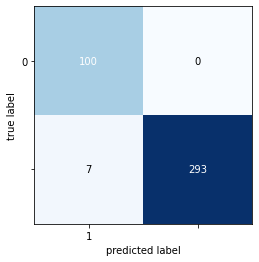

In [ ]:
cm = confusion_matrix(ImB_test_y, logreg_upsample.predict(test_Sscaled.drop(columns='IM_price_range')))
fig, ax = plot_confusion_matrix(conf_mat=cm)
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['1', '0'])
plt.show()

Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


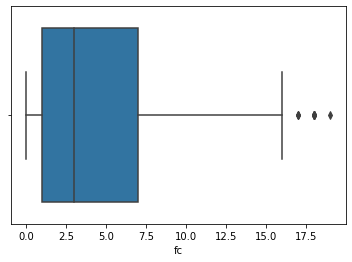

In [ ]:
sns.boxplot(train['fc'])

In [ ]:
Q1 = np.percentile(train['fc'], 25,interpolation = 'midpoint')
Q3 = np.percentile(train['fc'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1

IQR

6.0

In [ ]:
print("Old Shape: ", train.shape)
 
upper_index = train[train['fc'] >= (Q3+1.5*IQR)].index.values
lower_index = train[train['fc'] <= (Q1-1.5*IQR)].index.values
 
train_1 = train.drop(index = upper_index)
train_1.drop(index = lower_index, inplace=True)
 
print("New Shape: ", train_1.shape)

Old Shape:  (1600, 21)
New Shape:  (1572, 21)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


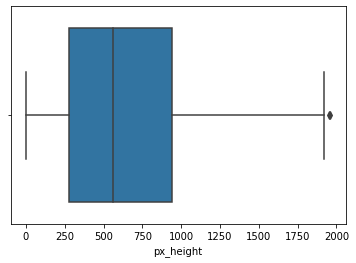

In [ ]:
sns.boxplot(train_1['px_height'])

In [ ]:
Q1 = np.percentile(train_1['px_height'], 25,interpolation = 'midpoint')
Q3 = np.percentile(train_1['px_height'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1

IQR

664.0

In [ ]:
print("Old Shape: ", train_1.shape)
 
upper_index = train_1[train_1['px_height'] >= (Q3+1.5*IQR)].index.values
lower_index = train_1[train_1['px_height'] <= (Q1-1.5*IQR)].index.values
 
train_1.drop(index = upper_index, inplace=True)
train_1.drop(index = lower_index, inplace=True)
 
print("New Shape: ", train_1.shape)

Old Shape:  (1572, 21)
New Shape:  (1570, 21)


In [ ]:
logreg_out = LogisticRegression(multi_class='ovr', solver='liblinear')
logreg_out.fit(train_1.drop(columns='price_range'), train_1.price_range)

logreg_out.score(test.drop(columns='price_range'), test.price_range)

0.7825

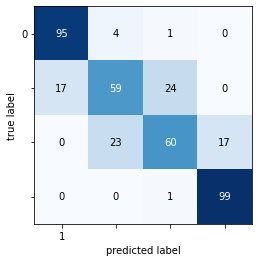

In [ ]:
cm = confusion_matrix(test.price_range, logreg_out.predict(test.drop(columns='price_range')))
fig, ax = plot_confusion_matrix(conf_mat=cm)
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['1', '0'])
plt.show()